In [29]:
from pathlib import Path

# Force repo root
ROOT = Path(".").resolve()   # current repo root
DATA = ROOT / "data"         # all datasets should go here
OUTPUTS = ROOT / "outputs"   # processed outputs go here

print(" Project root:", ROOT)
print("Data folder:", DATA)
print("Outputs folder:", OUTPUTS)

 Project root: /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection
Data folder: /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection/data
Outputs folder: /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection/outputs


In [30]:
import os

# Use relative path (inside repo)
dataset_path = "data/DCSASS_raw"

# List all subdirectories as categories
categories = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
print("Categories:", categories)

Categories: ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'DCSASS Dataset', 'Explosion', 'Fighting', 'Labels', 'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']


In [22]:
!pip install roboflow


In [23]:
pip install 'imageio[ffmpeg]'

Note: you may need to restart the kernel to use updated packages.


In [31]:
import os

# Use repo root as base path
base_path = "."

# List contents of the repo root
print(os.listdir(base_path))

['.DS_Store', 'requirements.txt', 'openv6main.yaml', 'README.md', '.ipynb_checkpoints', 'data', 'outputs', 'notebooks', 'src']


In [32]:

import os
from pathlib import Path

# Use repo-relative path
base_yolo_dir = Path("outputs/smart_home_yolo")
subfolders = ["images/train", "images/val", "images/test"]

for folder in subfolders:
    os.makedirs(base_yolo_dir / folder, exist_ok=True)

print("✅ YOLO folder structure created at:", base_yolo_dir.resolve())


✅ YOLO folder structure created at: /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection/outputs/smart_home_yolo


In [33]:
import os
import cv2
from pathlib import Path

# --- CONFIGURATION ---
# Repo-relative paths
video_root = Path("data/DCSASS_raw")   # raw videos go here
output_dir = Path("outputs/smart_home_yolo/images/train")  # extracted frames
target_categories = ["Robbery", "Burglary", "Stealing"]  
max_frames_per_video = 2  # limit frames to avoid overloading

# Create output folder
output_dir.mkdir(parents=True, exist_ok=True)

# === FRAME EXTRACTION LOOP ===
for category in target_categories:
    category_path = video_root / category

    if not category_path.exists():
        print(f"❌ Category folder not found: {category_path}")
        continue

    print(f"\n🔍 Processing category: {category}")

    for root, _, files in os.walk(category_path):
        for file in sorted(files):
            if file.lower().endswith(".mp4"):
                video_path = Path(root) / file
                cap = cv2.VideoCapture(str(video_path))

                if not cap.isOpened():
                    print(f"❌ Failed to open: {video_path}")
                    continue

                video_name = os.path.splitext(file)[0]
                frame_count = 0

                while frame_count < max_frames_per_video:
                    ret, frame = cap.read()
                    if not ret:
                        break
                    frame_filename = output_dir / f"{video_name}_frame_{frame_count:04d}.jpg"
                    cv2.imwrite(str(frame_filename), frame)
                    frame_count += 1

                cap.release()
                print(f"✅ {file}: {frame_count} frames saved.")

print("Done extracting frames.")


🔍 Processing category: Robbery
✅ Robbery049_x264_0.mp4: 2 frames saved.
✅ Robbery049_x264_1.mp4: 2 frames saved.
✅ Robbery049_x264_10.mp4: 2 frames saved.
✅ Robbery049_x264_11.mp4: 2 frames saved.
✅ Robbery049_x264_12.mp4: 2 frames saved.
✅ Robbery049_x264_13.mp4: 2 frames saved.
✅ Robbery049_x264_14.mp4: 2 frames saved.
✅ Robbery049_x264_15.mp4: 2 frames saved.
✅ Robbery049_x264_16.mp4: 2 frames saved.
✅ Robbery049_x264_17.mp4: 2 frames saved.
✅ Robbery049_x264_18.mp4: 2 frames saved.
✅ Robbery049_x264_19.mp4: 2 frames saved.
✅ Robbery049_x264_2.mp4: 2 frames saved.
✅ Robbery049_x264_20.mp4: 2 frames saved.
✅ Robbery049_x264_21.mp4: 2 frames saved.
✅ Robbery049_x264_22.mp4: 2 frames saved.
✅ Robbery049_x264_23.mp4: 2 frames saved.
✅ Robbery049_x264_24.mp4: 2 frames saved.
✅ Robbery049_x264_25.mp4: 2 frames saved.
✅ Robbery049_x264_26.mp4: 2 frames saved.
✅ Robbery049_x264_27.mp4: 2 frames saved.
✅ Robbery049_x264_28.mp4: 2 frames saved.
✅ Robbery049_x264_29.mp4: 2 frames saved.
✅ Rob

In [34]:
from pathlib import Path

# Point to the train images inside outputs/
frames_dir = ROOT / "outputs" / "smart_home_yolo" / "images" / "train"

# Count only image files (jpg/png)
frames = [f for f in frames_dir.iterdir() if f.suffix.lower() in {".jpg", ".png"}]

print("Total frames:", len(frames))

Total frames: 13822


In [35]:
import os
import shutil

# Source root of OID dataset (inside data/)
oid_root = "data/OIDv6_ToolKit/OID/Dataset/train"

# Destination folders (inside outputs/)
target_img_dir = "outputs/openv6_yolo_format/images/train"
target_lbl_dir = "outputs/openv6_yolo_format/labels/train"
os.makedirs(target_img_dir, exist_ok=True)
os.makedirs(target_lbl_dir, exist_ok=True)

#  Go through each class folder
classes = os.listdir(oid_root)
for class_name in classes:
    class_path = os.path.join(oid_root, class_name)
    if not os.path.isdir(class_path):
        continue

    for file in os.listdir(class_path):
        fpath = os.path.join(class_path, file)

        if file.endswith(".jpg"):
            shutil.copy2(fpath, os.path.join(target_img_dir, file))
        elif file.endswith(".txt"):
            shutil.copy2(fpath, os.path.join(target_lbl_dir, file))

print("✅ All images and labels copied into YOLO format.")

✅ All images and labels copied into YOLO format.


In [36]:
import os
import shutil
from glob import glob

# 📁 Source label folders (per class)
source_root = "data/OIDv6_ToolKit/OID/Dataset/train"
target_label_dir = "outputs/openv6_yolo_format/labels/train"

# ✅ Make sure target dir exists
os.makedirs(target_label_dir, exist_ok=True)

count = 0
for class_folder in os.listdir(source_root):
    label_dir = os.path.join(source_root, class_folder, "Label")
    if not os.path.isdir(label_dir):
        continue

    for label_file in glob(os.path.join(label_dir, "*.txt")):
        shutil.copy(label_file, os.path.join(target_label_dir, os.path.basename(label_file)))
        count += 1

print(f" Copied {count} label files to YOLO label directory.")

 Copied 8649 label files to YOLO label directory.


In [37]:
import os

# Path to labels (portable, relative to repo root)
labels_dir = "outputs/openv6_yolo_format/labels/train"

# Class names in order as defined in openv6 YAML file
class_list = [
    "Person", "Weapon", "Handgun", "Shotgun", "Helmet",
    "Scarf", "Knife", "Kitchen knife", "Baseball bat", "Backpack", "Flashlight"
]

# 🔁 Loop through each label file
for filename in os.listdir(labels_dir):
    if filename.endswith(".txt"):
        path = os.path.join(labels_dir, filename)
        new_lines = []
        with open(path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                class_name = parts[0]
                if class_name not in class_list:
                    print(f"❌ Unknown class name '{class_name}' in {filename}")
                    continue
                class_id = class_list.index(class_name)
                new_line = " ".join([str(class_id)] + parts[1:])
                new_lines.append(new_line)

        with open(path, "w") as f:
            f.write("\n".join(new_lines) + "\n")

print("All label files converted to numeric class IDs.")

❌ Unknown class name 'Baseball' in 64096eff2f2b63b7.txt
❌ Unknown class name 'Baseball' in 5957a7362649b2dc.txt
❌ Unknown class name 'Kitchen' in 27d6a11180b87c60.txt
❌ Unknown class name 'Kitchen' in 27d6a11180b87c60.txt
❌ Unknown class name 'Baseball' in a7a1a3dd16a69ed0.txt
❌ Unknown class name 'Baseball' in a7a1a3dd16a69ed0.txt
❌ Unknown class name 'Baseball' in 1a339c8707be4a7f.txt
❌ Unknown class name 'Baseball' in 1a339c8707be4a7f.txt
❌ Unknown class name 'Baseball' in 865f1066c76b4d4a.txt
❌ Unknown class name 'Baseball' in ecf6e2168d02becd.txt
❌ Unknown class name 'Baseball' in 06ee4bdb919d5d1c.txt
❌ Unknown class name 'Baseball' in 0658b07d5e5f31b8.txt
❌ Unknown class name 'Baseball' in 0658b07d5e5f31b8.txt
❌ Unknown class name 'Baseball' in 04c4ad6d764fde33.txt
❌ Unknown class name 'Baseball' in 04c4ad6d764fde33.txt
❌ Unknown class name 'Baseball' in 04c4ad6d764fde33.txt
❌ Unknown class name 'Baseball' in 04c4ad6d764fde33.txt
❌ Unknown class name 'Baseball' in 04c4ad6d764fde3

In [38]:
import os

# Paths (relative to repo root)
labels_dir = "outputs/openv6_yolo_format/labels/train"
images_dir = "outputs/openv6_yolo_format/images/train"

deleted_labels = 0
deleted_images = 0
valid_exts = {'.jpg', '.jpeg', '.png'}

for label_file in os.listdir(labels_dir):
    label_path = os.path.join(labels_dir, label_file)
    base_name = os.path.splitext(label_file)[0]
    image_path = None

    # Check for corresponding image
    for ext in valid_exts:
        temp_path = os.path.join(images_dir, base_name + ext)
        if os.path.exists(temp_path):
            image_path = temp_path
            break

    delete_reason = None
    try:
        with open(label_path, 'r') as f:
            lines = f.readlines()

        if not lines:
            delete_reason = "empty file"
        else:
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5 or not all(part.replace('.', '', 1).isdigit() for part in parts[1:]):
                    delete_reason = "invalid format"
                    break

    except Exception as e:
        delete_reason = f"read error: {e}"

    if delete_reason:
        os.remove(label_path)
        deleted_labels += 1
        if image_path:
            os.remove(image_path)
            deleted_images += 1
        print(f"🗑️ Deleted {label_file} ({delete_reason})")

print(f"\n✅ Cleanup complete. Deleted {deleted_labels} labels and {deleted_images} images.")

🗑️ Deleted 64096eff2f2b63b7.txt (invalid format)
🗑️ Deleted 5957a7362649b2dc.txt (invalid format)
🗑️ Deleted 27d6a11180b87c60.txt (invalid format)
🗑️ Deleted a7a1a3dd16a69ed0.txt (invalid format)
🗑️ Deleted 1a339c8707be4a7f.txt (invalid format)
🗑️ Deleted 865f1066c76b4d4a.txt (invalid format)
🗑️ Deleted ecf6e2168d02becd.txt (invalid format)
🗑️ Deleted 06ee4bdb919d5d1c.txt (invalid format)
🗑️ Deleted 0658b07d5e5f31b8.txt (invalid format)
🗑️ Deleted 04c4ad6d764fde33.txt (invalid format)
🗑️ Deleted 30acb267937d9584.txt (invalid format)
🗑️ Deleted 02ceee3d74f5e690.txt (invalid format)
🗑️ Deleted f866e761ec484d89.txt (invalid format)
🗑️ Deleted 5adb06b69aea0205.txt (invalid format)
🗑️ Deleted 0786102ecf484af3.txt (invalid format)
🗑️ Deleted 096fad467b990f88.txt (invalid format)
🗑️ Deleted a4c016ecfc10bc6c.txt (invalid format)
🗑️ Deleted c60e8b8b62928f85.txt (invalid format)
🗑️ Deleted 72dd98d4426be9c9.txt (invalid format)
🗑️ Deleted cd8fa21c2bcad5f9.txt (invalid format)
🗑️ Deleted 023e58ea1

/var/folders/sy/tv3v7f_x7s9g4tkz_4d624gm0000gn/T/ipykernel_30837/3214176868.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(labels)).colors


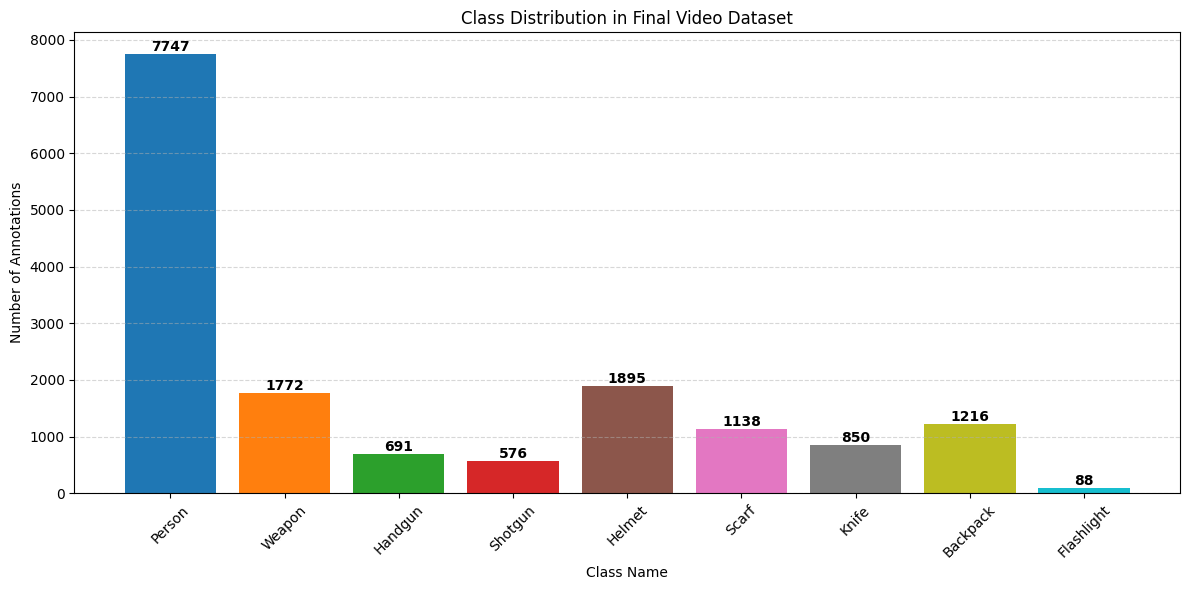

In [5]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path

# 🔑 Use relative path (portable for GitHub)
labels_dir = Path("outputs/openv6_yolo_format/labels/train")

# ✅ Class ID → name mapping
class_names = {
    0: "Person",
    1: "Weapon",
    2: "Handgun",
    3: "Shotgun",
    4: "Helmet",
    5: "Scarf",
    6: "Knife",
    7: "Kitchen knife",
    8: "Baseball bat",
    9: "Backpack",
    10: "Flashlight"
}

class_counts = Counter()

# 🔁 Count class occurrences
for filename in os.listdir(labels_dir):
    if filename.endswith(".txt"):
        file_path = labels_dir / filename
        with open(file_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if parts and parts[0].isdigit():
                    class_id = int(parts[0])
                    class_counts[class_id] += 1

# ✅ Prepare data for plotting
sorted_ids = sorted(class_counts.keys())
counts = [class_counts[i] for i in sorted_ids]
labels = [class_names[i] for i in sorted_ids]

# 🎨 Assign unique colors (cycled if >10 classes)
colors = plt.cm.get_cmap("tab10", len(labels)).colors  

# 📊 Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color=colors)

# 🏷️ Add numbers above each bar
for bar, count in zip(bars, counts):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        str(count),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Class Distribution in Final Video Dataset")
plt.xlabel("Class Name")
plt.ylabel("Number of Annotations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [39]:
import os, random, shutil
from pathlib import Path

ROOT = Path.cwd()
IMG_TRAIN = ROOT/"outputs/openv6_yolo_format/images/train"
LBL_TRAIN = ROOT/"outputs/openv6_yolo_format/labels/train"
IMG_VAL   = ROOT/"outputs/openv6_yolo_format/images/val"
LBL_VAL   = ROOT/"outputs/openv6_yolo_format/labels/val"

IMG_VAL.mkdir(parents=True, exist_ok=True)
LBL_VAL.mkdir(parents=True, exist_ok=True)

valid_exts = {".jpg", ".jpeg", ".png"}
train_images = [p for p in IMG_TRAIN.iterdir() if p.suffix.lower() in valid_exts]
random.seed(42)

# choose 10% (at least 200, at most all)
k = max(200, int(len(train_images) * 0.10))
k = min(k, len(train_images))
sample = random.sample(train_images, k)

copied = 0
for img in sample:
    stem = img.stem
    # label must exist
    lbl = LBL_TRAIN / f"{stem}.txt"
    if not lbl.exists():
        continue
    shutil.copy2(img, IMG_VAL / img.name)
    shutil.copy2(lbl, LBL_VAL / lbl.name)
    copied += 1

# remove old cache so Ultralytics rebuilds
cache_file = LBL_TRAIN.with_suffix(".cache")
if cache_file.exists():
    cache_file.unlink()

print(f"✅ Copied {copied} image/label pairs to val.")
print("images/val =", len(list(IMG_VAL.glob('*'))),
      "labels/val =", len(list(LBL_VAL.glob('*.txt'))))

✅ Copied 725 image/label pairs to val.
images/val = 725 labels/val = 725


In [40]:
from pathlib import Path

DS = Path("outputs/openv6_yolo_format")
for p in [DS/"images/train", DS/"images/val", DS/"labels/train", DS/"labels/val"]:
    print(p, "exists=", p.exists(), "count=", len(list(p.glob('*'))))

outputs/openv6_yolo_format/images/train exists= True count= 7256
outputs/openv6_yolo_format/images/val exists= True count= 725
outputs/openv6_yolo_format/labels/train exists= True count= 7256
outputs/openv6_yolo_format/labels/val exists= True count= 725


In [41]:
from pathlib import Path
import os, cv2

ROOT = Path.cwd()  # run this from your repo root
DATASET = ROOT / "outputs" / "openv6_yolo_format"
IMG_DIRS = [DATASET/"images/train", DATASET/"images/val"]
LBL_DIRS = [DATASET/"labels/train", DATASET/"labels/val"]

valid_exts = {".jpg", ".jpeg", ".png"}

def find_image(stem):
    for d in IMG_DIRS:
        for ext in valid_exts:
            p = d / f"{stem}{ext}"
            if p.exists():
                return p
    return None

def convert_line(tokens, W, H):
    """
    tokens: list[str] like [cls, x1, y1, x2, y2] (pixels) or [cls, cx, cy, w, h] (normalized)
    returns normalized 'cls cx cy w h' or None to drop.
    """
    if len(tokens) < 5:
        return None
    cls = tokens[0]
    nums = tokens[1:5]
    try:
        vals = [float(x) for x in nums]
    except Exception:
        return None

    x1, y1, x2, y2 = vals

    # Heuristic: if any coord > 1 -> treat as pixels and convert; else assume already normalized YOLO
    if max(vals) > 1.0:
        # swap if reversed
        x1, x2 = sorted([x1, x2])
        y1, y2 = sorted([y1, y2])
        # clip to image
        x1 = min(max(x1, 0), W-1)
        x2 = min(max(x2, 0), W-1)
        y1 = min(max(y1, 0), H-1)
        y2 = min(max(y2, 0), H-1)
        w = x2 - x1
        h = y2 - y1
        if w <= 1 or h <= 1:
            return None
        cx = x1 + w/2.0
        cy = y1 + h/2.0
        # normalize
        cx_n, cy_n = cx / W, cy / H
        w_n,  h_n  = w  / W, h  / H
        # final clamp
        cx_n = min(max(cx_n, 0.0), 1.0)
        cy_n = min(max(cy_n, 0.0), 1.0)
        w_n  = min(max(w_n,  1e-6), 1.0)
        h_n  = min(max(h_n,  1e-6), 1.0)
        return f"{cls} {cx_n:.6f} {cy_n:.6f} {w_n:.6f} {h_n:.6f}"
    else:
        # looks already normalized YOLO; do a quick sanity check
        cx, cy, w, h = vals
        if not (0 <= cx <= 1 and 0 <= cy <= 1 and 0 < w <= 1 and 0 < h <= 1):
            return None
        return f"{cls} {cx:.6f} {cy:.6f} {w:.6f} {h:.6f}"

def process_label_file(lbl_path: Path):
    stem = lbl_path.stem
    img_path = find_image(stem)
    if not img_path:
        return (0, 0, "no_image")

    img = cv2.imread(str(img_path))
    if img is None:
        return (0, 0, "bad_image")
    H, W = img.shape[:2]

    kept, dropped = 0, 0
    out_lines = []
    for raw in lbl_path.read_text().splitlines():
        raw = raw.strip()
        if not raw:
            continue
        parts = raw.split()
        # Keep only first 5 fields if there are extra polygon points etc.
        parts = parts[:5]
        converted = convert_line(parts, W, H)
        if converted:
            out_lines.append(converted)
            kept += 1
        else:
            dropped += 1

    if out_lines:
        lbl_path.write_text("\n".join(out_lines) + "\n")
    else:
        # if nothing valid, empty the file to let your cleanup script remove it later if you want
        lbl_path.write_text("")
    return (kept, dropped, "ok")

def main():
    total_kept = total_drop = files = no_img = bad_img = 0
    for LBL_DIR in LBL_DIRS:
        if not LBL_DIR.exists():
            continue
        for lbl in LBL_DIR.glob("*.txt"):
            files += 1
            kept, dropped, status = process_label_file(lbl)
            total_kept += kept
            total_drop += dropped
            if status == "no_image": no_img += 1
            if status == "bad_image": bad_img += 1

    # Remove Ultralytics caches so they rebuild
    for cache in (DATASET/"labels/train.cache", DATASET/"labels/val.cache"):
        if cache.exists():
            cache.unlink()

    print("✅ Fix complete")
    print(f"  label files seen: {files}")
    print(f"  boxes kept: {total_kept}")
    print(f"  boxes dropped: {total_drop}")
    print(f"  labels with no matching image: {no_img}")
    print(f"  unreadable images: {bad_img}")
    print("  caches removed: labels/train.cache, labels/val.cache (if present)")

main()

✅ Fix complete
  label files seen: 7981
  boxes kept: 17630
  boxes dropped: 3
  labels with no matching image: 0
  unreadable images: 0
  caches removed: labels/train.cache, labels/val.cache (if present)


In [42]:
from pathlib import Path
DATASET = Path("outputs/openv6_yolo_format")
def purge(lbl_dir, img_dir):
    removed=0
    for lbl in lbl_dir.glob("*.txt"):
        if lbl.stat().st_size==0:
            for ext in (".jpg",".jpeg",".png"):
                p=(img_dir/lbl.stem).with_suffix(ext)
                if p.exists(): p.unlink()
            lbl.unlink(); removed+=1
    print(f"Removed {removed} empty pairs from {lbl_dir}")
purge(DATASET/"labels/train", DATASET/"images/train")
purge(DATASET/"labels/val",   DATASET/"images/val")

Removed 0 empty pairs from outputs/openv6_yolo_format/labels/train
Removed 0 empty pairs from outputs/openv6_yolo_format/labels/val


In [9]:
import os
from pathlib import Path

# Always force working directory to repo root before training
def goto_repo_root(marker="openv6main.yaml"):
    """
    Move cwd to repo root by looking for a marker file (default: openv6main.yaml).
    This prevents paths from getting stuck inside notebooks/.
    """
    for cand in [Path.cwd(), *Path.cwd().parents]:
        if (cand / marker).exists():
            os.chdir(cand)
            print("CWD set to repo root:", cand)
            return cand
    raise FileNotFoundError(f"❌ Could not find {marker} in cwd or parents!")

#  Use this before training
ROOT = goto_repo_root()

CWD set to repo root: /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection


In [10]:
from ultralytics import YOLO
import torch

device = "mps" if torch.backends.mps.is_available() else "cpu"
model = YOLO("yolov8n.pt")

model.train(
    data="openv6main.yaml",
    epochs=20,          
    imgsz=640,
    batch=16,
    workers=0,
    val=True,
    name="openv6_intruder_model"
    
)

New https://pypi.org/project/ultralytics/8.3.195 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.1 🚀 Python-3.10.18 torch-2.1.2 CPU (Apple M4 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=openv6main.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=openv6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

train: Scanning /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection/outp
val: Scanning /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection/output

Plotting labels to runs/detect/openv6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.428      3.047       1.51         58        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/20         0G      1.507      2.554      1.563         40        640: 1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.541      2.453      1.586         37        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G      1.531      2.341      1.587         32        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G      1.509      2.241      1.562         50        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G      1.504       2.15      1.553         42        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/20         0G      1.461      2.074      1.529         30        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/20         0G       1.44      1.997      1.506         29        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/20         0G      1.426      1.959      1.502         29        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/20         0G      1.405      1.886      1.479         46        640: 1

Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G      1.417      1.804       1.52         13        640: 1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.392      1.715      1.494         12        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G      1.364      1.637      1.472         20        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G      1.335      1.568      1.441         23        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G      1.326      1.523      1.437         12        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/20         0G       1.29      1.472       1.41         14        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G      1.267      1.413      1.392         13        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/20         0G      1.255      1.367      1.375         13        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G      1.235      1.311       1.36         15        640: 1


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G      1.213      1.276      1.343         23        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        725       1657      0.769      0.661      0.755      0.548

20 epochs completed in 10.312 hours.
Optimizer stripped from runs/detect/openv6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/openv6/weights/best.pt, 6.2MB

Validating runs/detect/openv6/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.18 torch-2.1.2 CPU (Apple M4 Pro)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        725       1657       0.77      0.661      0.755      0.548
                Person        725        831      0.756      0.543       0.65      0.379
                Weapon        725        187      0.626      0.257      0.395      0.224
               Handgun        725         77      0.852       0.82      0.901      0.773
               Shotgun        725         62      0.667      0.484      0.607      0.399
                Helmet        725        179      0.767      0.737      0.829      0.519
                 Scarf        725         93      0.925      0.806      0.914      0.722
                 Knife        725        107      0.819      0.907      0.943      0.794
              Backpack        725        113      0.855       0.77      0.877      0.578
            Flashlight        725          8      0.665      0.625      0.681      0.539
Speed: 0.7ms preprocess, 91.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detec

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x356a859f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    

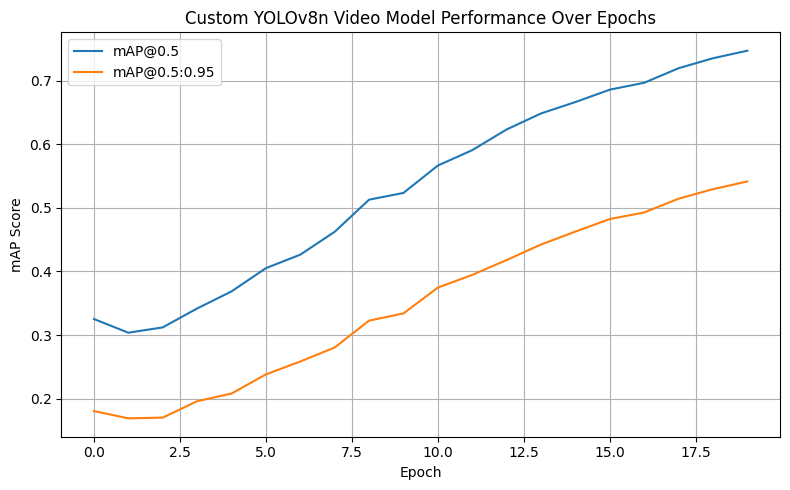

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path (portable)
csv_path = os.path.join("runs", "detect", "openv6_intruder_model5", "results.csv")

# Load CSV and strip column names
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # fix extra spaces

# Plotting mAP@0.5 and mAP@0.5:0.95 over epochs
plt.figure(figsize=(8, 5))
plt.plot(df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")
plt.title("Custom YOLOv8n Video Model Performance Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
from ultralytics import YOLO
from pathlib import Path

# ✅Load your trained model
model = YOLO("runs/detect/openv6_intruder_model5/weights/best.pt")

# 📂 Input (video frames) and output (labels)
image_dir = Path("outputs/smart_home_yolo/images/train")
label_dir = Path("outputs/smart_home_yolo/labels/train")
label_dir.mkdir(parents=True, exist_ok=True)

# 🔍 Supported extensions
exts = {".jpg", ".jpeg", ".png"}

# 🔧 Inference settings
CONF = 0.25
IOU = 0.5

for img_path in sorted(p for p in image_dir.iterdir() if p.suffix.lower() in exts):
    results = model.predict(source=str(img_path), conf=CONF, iou=IOU, verbose=False)
    r = results[0]

    lines = []
    if r.boxes is not None and len(r.boxes) > 0:
        xywhn = r.boxes.xywhn.cpu().numpy()   # normalized xywh
        cls_ids = r.boxes.cls.int().cpu().numpy()

        for (cx, cy, w, h), c in zip(xywhn, cls_ids):
            lines.append(f"{int(c)} {cx:.6f} {cy:.6f} {w:.6f} {h:.6f}")

    # Write YOLO labels (empty file if no detections)
    txt_path = label_dir / f"{img_path.stem}.txt"
    with open(txt_path, "w") as f:
        f.write("\n".join(lines))

    print(f"{img_path.name} -> {txt_path.name} ({len(lines)} labels)")

print("Auto-labeling complete using custom-trained model.")

Burglary001_x264_0_frame_0000.jpg -> Burglary001_x264_0_frame_0000.txt (0 labels)
Burglary001_x264_0_frame_0001.jpg -> Burglary001_x264_0_frame_0001.txt (0 labels)
Burglary001_x264_10_frame_0000.jpg -> Burglary001_x264_10_frame_0000.txt (1 labels)
Burglary001_x264_10_frame_0001.jpg -> Burglary001_x264_10_frame_0001.txt (1 labels)
Burglary001_x264_11_frame_0000.jpg -> Burglary001_x264_11_frame_0000.txt (1 labels)
Burglary001_x264_11_frame_0001.jpg -> Burglary001_x264_11_frame_0001.txt (1 labels)
Burglary001_x264_12_frame_0000.jpg -> Burglary001_x264_12_frame_0000.txt (0 labels)
Burglary001_x264_12_frame_0001.jpg -> Burglary001_x264_12_frame_0001.txt (0 labels)
Burglary001_x264_13_frame_0000.jpg -> Burglary001_x264_13_frame_0000.txt (0 labels)
Burglary001_x264_13_frame_0001.jpg -> Burglary001_x264_13_frame_0001.txt (0 labels)
Burglary001_x264_14_frame_0000.jpg -> Burglary001_x264_14_frame_0000.txt (1 labels)
Burglary001_x264_14_frame_0001.jpg -> Burglary001_x264_14_frame_0001.txt (1 labe

In [18]:
from pathlib import Path

# 📂 Repo-relative paths
images_dir = Path("outputs/smart_home_yolo/images/train")
labels_dir = Path("outputs/smart_home_yolo/labels/train")

valid_exts = {".jpg", ".jpeg", ".png"}

deleted_no_label = 0
deleted_empty_label = 0

# 1) Remove images with NO label file
for img in images_dir.iterdir():
    if img.is_file() and img.suffix.lower() in valid_exts:
        label = labels_dir / f"{img.stem}.txt"
        if not label.exists():
            img.unlink()
            deleted_no_label += 1

# 2) Remove images whose label file is EMPTY (0 detections / whitespace only)
for label in labels_dir.glob("*.txt"):
    # Read and check for any non-empty lines
    try:
        text = label.read_text().strip()
    except Exception:
        text = ""  # treat unreadable as empty

    if not text:  # empty or whitespace-only
        img_deleted_here = False
        # Try all common image extensions
        for ext in valid_exts:
            img = images_dir / f"{label.stem}{ext}"
            if img.exists():
                img.unlink()
                img_deleted_here = True
                break
        label.unlink()  # also remove the empty label file itself
        if img_deleted_here:
            deleted_empty_label += 1

print(f"🧹 Removed {deleted_no_label} images without labels.")
print(f"🧹 Removed {deleted_empty_label} image+empty-label pairs.")

🧹 Removed 0 images without labels.
🧹 Removed 7878 image+empty-label pairs.


In [19]:
import os
import random
import shutil
from pathlib import Path

# ✏️ Repo-relative base path
base_path = Path("outputs/smart_home_yolo")

image_train_dir = base_path / "images/train"
label_train_dir = base_path / "labels/train"
image_val_dir   = base_path / "images/val"
label_val_dir   = base_path / "labels/val"

# Create val directories if they don't exist
image_val_dir.mkdir(parents=True, exist_ok=True)
label_val_dir.mkdir(parents=True, exist_ok=True)

# Get all image filenames (JPG only)
image_files = [f.name for f in image_train_dir.glob("*.jpg")]

# Split 20% into val set
val_ratio = 0.2
k = int(len(image_files) * val_ratio)
val_images = random.sample(image_files, k) if k > 0 else []

for img_file in val_images:
    label_file = Path(img_file).with_suffix(".txt").name

    # Move image
    shutil.move(str(image_train_dir / img_file), str(image_val_dir / img_file))

    # Move corresponding label if it exists
    label_src = label_train_dir / label_file
    label_dst = label_val_dir / label_file
    if label_src.exists():
        shutil.move(str(label_src), str(label_dst))

print(f"✅ Moved {len(val_images)} images and their labels to validation set.")

✅ Moved 1188 images and their labels to validation set.


In [16]:
import os
import random
import shutil

# ✏️ Set your project path here
base_path = "/Users/adarshthakur/Desktop/SHID/smart_home_yolo"
image_train_dir = os.path.join(base_path, "images/train")
label_train_dir = os.path.join(base_path, "labels/train")
image_val_dir = os.path.join(base_path, "images/val")
label_val_dir = os.path.join(base_path, "labels/val")

# Create val directories if they don't exist
os.makedirs(image_val_dir, exist_ok=True)
os.makedirs(label_val_dir, exist_ok=True)

# Get all image filenames (JPG only)
image_files = [f for f in os.listdir(image_train_dir) if f.endswith(".jpg")]

# Split 20% into val set
val_ratio = 0.2
val_images = random.sample(image_files, int(len(image_files) * val_ratio))

for img_file in val_images:
    label_file = os.path.splitext(img_file)[0] + ".txt"

    # Move image
    shutil.move(os.path.join(image_train_dir, img_file), os.path.join(image_val_dir, img_file))

    # Move corresponding label if it exists
    label_src = os.path.join(label_train_dir, label_file)
    label_dst = os.path.join(label_val_dir, label_file)
    if os.path.exists(label_src):
        shutil.move(label_src, label_dst)

print(f"✅ Moved {len(val_images)} images and their labels to validation set.")


✅ Moved 1063 images and their labels to validation set.


In [20]:
from ultralytics import YOLO

# Fine-tuning of intruder model
model = YOLO("runs/detect/openv6_intruder_model5/weights/best.pt")

# 🔑Use relative path (YAML must be in repo root)
model.train(
    data="smart_home_main.yaml",       
    epochs=20,
    imgsz=640,
    batch=16,
    name="openv6_smart_home_finetuned"
)

New https://pypi.org/project/ultralytics/8.3.196 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.1 🚀 Python-3.10.18 torch-2.1.2 CPU (Apple M4 Pro)
engine/trainer: task=detect, mode=train, model=runs/detect/openv6_intruder_model5/weights/best.pt, data=smart_home_main.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=openv6_smart_home_finetuned, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

train: Scanning /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection/outp

train: New cache created: /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection/outputs/smart_home_yolo/labels/train.cache



val: Scanning /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection/output

val: New cache created: /Users/adarshthakur/Downloads/Smart_Home_Intruder_detection/outputs/smart_home_yolo/labels/val.cache
Plotting labels to runs/detect/openv6_smart_home_finetuned/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G     0.9736      1.694      1.288          8        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.738      0.505      0.593       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      0.926      1.425       1.24          6        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.692      0.535      0.621      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.9183      1.375      1.231          7        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.643      0.578      0.597      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.9085      1.326      1.222         12        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.722      0.563      0.625      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.8882       1.27      1.203         12        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.721      0.559      0.621      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.8504      1.198      1.182         12        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.658      0.583       0.64      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.8438      1.154      1.174          7        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.671      0.611      0.629      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.8225      1.107      1.157          8        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.688      0.656      0.658      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.8081      1.086      1.151          8        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481       0.73      0.631      0.666      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.7888      1.048       1.14          9        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.697      0.667      0.659      0.551


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.6902     0.8234      1.077          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.749      0.605      0.671      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.6553     0.7605      1.055          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.721      0.671      0.687      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G      0.629     0.7285      1.034          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.753      0.683      0.698      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.6114     0.6873      1.022          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.711      0.692      0.696      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.5899     0.6563       1.01          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.721      0.751      0.726      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.5711     0.6268     0.9961          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.761      0.696      0.715      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.5517     0.5983     0.9891          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.743      0.731      0.718      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.5422     0.5826     0.9797          6        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.765      0.746      0.737      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.5258     0.5516     0.9698          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.805       0.71      0.745      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.5115     0.5366     0.9591          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1188       1481      0.798      0.743      0.751      0.655



20 epochs completed in 7.458 hours.
Optimizer stripped from runs/detect/openv6_smart_home_finetuned/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/openv6_smart_home_finetuned/weights/best.pt, 6.2MB

Validating runs/detect/openv6_smart_home_finetuned/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.18 torch-2.1.2 CPU (Apple M4 Pro)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1188       1481      0.795      0.743      0.751      0.656
                Person       1188        837      0.854      0.898      0.938      0.818
                Weapon       1188        220       0.72        0.8      0.783      0.633
               Handgun       1188         27      0.576      0.556      0.559      0.442
               Shotgun       1188         23      0.826       0.87      0.866      0.745
                Helmet       1188        287      0.842      0.889      0.933       0.83
                 Scarf       1188          1          1          0          0          0
                 Knife       1188         30      0.626      0.767      0.764      0.615
              Backpack       1188         21      0.882      0.905      0.947      0.897
            Flashlight       1188         35      0.829          1      0.973       0.92
Speed: 0.6ms preprocess, 93.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detec

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0xe1cd09990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    

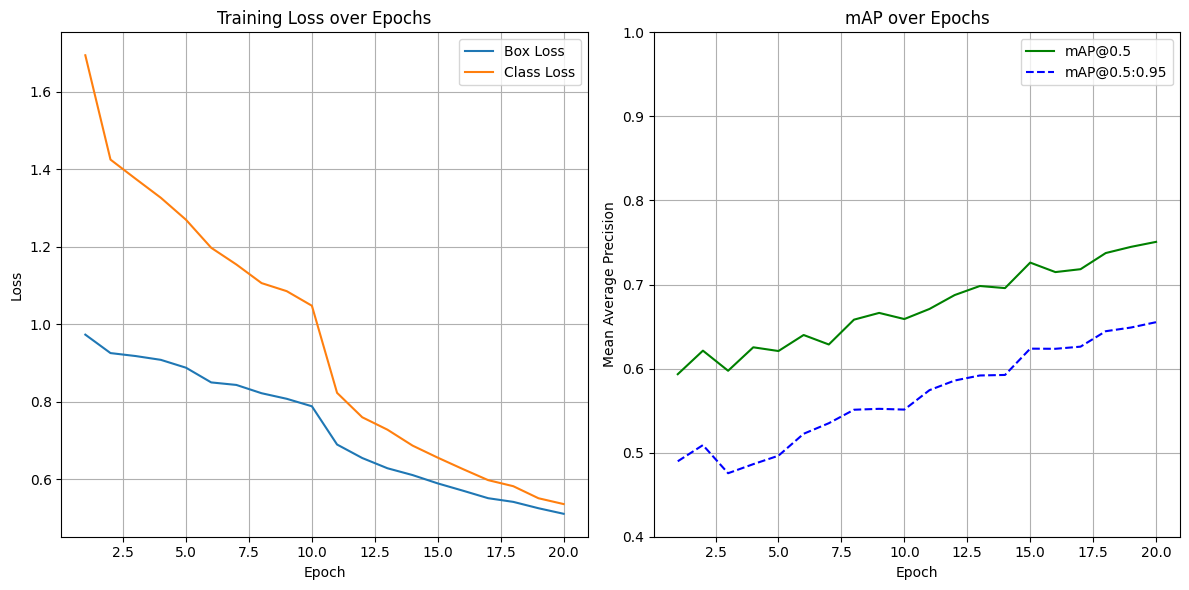

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the CSV (relative path inside repo)
csv_path = "runs/detect/openv6_smart_home_finetuned/results.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()

# Plot
plt.figure(figsize=(12, 6))

# Subplot 1: Training Losses
plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 2: mAP scores
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5', color='green')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', color='blue', linestyle='--')
plt.title('mAP over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Average Precision')
plt.ylim(0.4, 1.0)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [30]:
import os, csv, sys
import cv2
from datetime import datetime
from ultralytics import YOLO

# === CONFIG (relative paths for GitHub) ===
BASE_PATH   = "data/DCSASS_raw/Burglary"  # videos to scan
WEIGHTS     = "runs/detect/openv6_smart_home_finetuned/weights/best.pt"
OUT_CSV     = "outputs/burglary_detections.csv"

CONF        = 0.5
FRAME_STRIDE= 10
MAX_FRAMES  = None

# classes
RELEVANT = ['Person', 'Helmet', 'Scarf', 'Backpack', 'Knife', 'Shotgun', 'Handgun', 'Flashlight']

# === HELPERS ===
def is_night_time():
    h = datetime.now().hour
    return (h < 6) or (h > 20)

def apply_logic(classes_detected):
    s = set(classes_detected)
    if 'Person' in s and s.intersection({'Helmet','Scarf','Backpack'}) and is_night_time():
        return " Person with covered face at night"
    if 'Person' in s and s.intersection({'Knife','Shotgun','Handgun'}):
        return " Person with weapon"
    if 'Person' in s:
        return " Person detected"
    return None

def load_done_keys(csv_path):
    """Return set of (video, frame) already written, to allow resume."""
    if not os.path.exists(csv_path):
        return set()
    done = set()
    try:
        with open(csv_path, newline='') as f:
            r = csv.DictReader(f)
            for row in r:
                done.add((row['video'], int(row['frame'])))
    except Exception as e:
        print(f" Could not read existing CSV for resume: {e}")
    return done

def ensure_csv_header(csv_path, fieldnames):
    # ensure parent folder exists (keeps behavior the same otherwise)
    os.makedirs(os.path.dirname(csv_path), exist_ok=True) if os.path.dirname(csv_path) else None
    if not os.path.exists(csv_path):
        with open(csv_path, "w", newline="") as f:
            w = csv.DictWriter(f, fieldnames=fieldnames)
            w.writeheader()

def append_rows(csv_path, fieldnames, rows):
    if not rows:
        return
    with open(csv_path, "a", newline="") as f:
        w = csv.DictWriter(f, fieldnames=fieldnames)
        w.writerows(rows)

# === MODEL ===
model = YOLO(WEIGHTS)

# === DISCOVER VIDEOS ===
video_files = []
for root, _, files in os.walk(BASE_PATH):
    for fn in files:
        if fn.lower().endswith(".mp4"):
            video_files.append(os.path.join(root, fn))
video_files.sort()

print(f"🔍 Found {len(video_files)} videos to process.")

# === CSV PREP ===
fieldnames = ["video", "frame", "labels", "alert"] + [f"conf_{c}" for c in RELEVANT]
ensure_csv_header(OUT_CSV, fieldnames)
done_keys = load_done_keys(OUT_CSV)

# === PROCESS (SEQUENTIAL, ROBUST) ===
total_alerts = 0
for vid_idx, vpath in enumerate(video_files, 1):
    cap = cv2.VideoCapture(vpath)
    if not cap.isOpened():
        print(f" Cannot open: {os.path.basename(vpath)}")
        continue

    rows_to_write = []
    frame_id = 0
    processed_frames = 0
    alerts_this_video = 0
    vname = os.path.basename(vpath)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_id % FRAME_STRIDE != 0:
            frame_id += 1
            continue
        if MAX_FRAMES is not None and processed_frames >= MAX_FRAMES:
            break

        # Skip if already written (resume support)
        if (vname, frame_id) in done_keys:
            frame_id += 1
            processed_frames += 1
            continue

        try:
            results = model.predict(source=frame, conf=CONF, verbose=False)
        except Exception as e:
            print(f" Error on {vname} frame {frame_id}: {e}")
            break

        classes = []
        per_class_conf = {c: 0.0 for c in RELEVANT}

        for r in results:
            if getattr(r, "boxes", None) is None:
                continue
            cls_list = r.boxes.cls.tolist()
            conf_list = r.boxes.conf.tolist()
            for cls_id, conf in zip(cls_list, conf_list):
                lbl = model.names[int(cls_id)]
                if lbl in per_class_conf:
                    classes.append(lbl)
                    if conf > per_class_conf[lbl]:
                        per_class_conf[lbl] = float(conf)

        alert = apply_logic(classes)
        if alert:
            det = {
                "video": vname,
                "frame": frame_id,
                "labels": ",".join(sorted(set(classes))),
                "alert": alert,
            }
            for c in RELEVANT:
                det[f"conf_{c}"] = round(per_class_conf[c], 4)
            rows_to_write.append(det)
            done_keys.add((vname, frame_id))
            alerts_this_video += 1

        frame_id += 1
        processed_frames += 1

        if len(rows_to_write) >= 100:
            append_rows(OUT_CSV, fieldnames, rows_to_write)
            total_alerts += len(rows_to_write)
            rows_to_write = []

    cap.release()
    if rows_to_write:
        append_rows(OUT_CSV, fieldnames, rows_to_write)
        total_alerts += len(rows_to_write)

    print(f" [{vid_idx}/{len(video_files)}] {vname} — {alerts_this_video} alerts")

print(f"Finished. {total_alerts} alerts → {OUT_CSV}")

🔍 Found 1504 videos to process.
 [1/1504] Burglary001_x264_0.mp4 — 0 alerts
 [2/1504] Burglary001_x264_1.mp4 — 0 alerts
 [3/1504] Burglary001_x264_10.mp4 — 9 alerts
 [4/1504] Burglary001_x264_11.mp4 — 9 alerts
 [5/1504] Burglary001_x264_12.mp4 — 3 alerts
 [6/1504] Burglary001_x264_13.mp4 — 2 alerts
 [7/1504] Burglary001_x264_14.mp4 — 7 alerts
 [8/1504] Burglary001_x264_15.mp4 — 0 alerts
 [9/1504] Burglary001_x264_16.mp4 — 7 alerts
 [10/1504] Burglary001_x264_17.mp4 — 6 alerts
 [11/1504] Burglary001_x264_18.mp4 — 0 alerts
 [12/1504] Burglary001_x264_19.mp4 — 1 alerts
 [13/1504] Burglary001_x264_2.mp4 — 0 alerts
 [14/1504] Burglary001_x264_20.mp4 — 0 alerts
 [15/1504] Burglary001_x264_21.mp4 — 0 alerts
 [16/1504] Burglary001_x264_22.mp4 — 0 alerts
 [17/1504] Burglary001_x264_23.mp4 — 0 alerts
 [18/1504] Burglary001_x264_24.mp4 — 0 alerts
 [19/1504] Burglary001_x264_25.mp4 — 0 alerts
 [20/1504] Burglary001_x264_26.mp4 — 0 alerts
 [21/1504] Burglary001_x264_27.mp4 — 0 alerts
 [22/1504] Bur

In [32]:
import os
import csv
import pandas as pd
import numpy as np

#Paths (relative to repo root)
IN_CSV   = "outputs/burglary_detections.csv"
FIXED_CSV= "outputs/burglary_detections_fixed.csv"
OUT_CSV  = "outputs/video_features.csv"

# make sure the outputs/ folder exists
os.makedirs(os.path.dirname(FIXED_CSV), exist_ok=True)
os.makedirs(os.path.dirname(OUT_CSV), exist_ok=True)

VIDEO_CLASSES = ['Person','Helmet','Scarf','Backpack','Knife','Shotgun','Handgun','Flashlight']

# 1) Repair malformed CSV (labels had commas) 
rows = []
with open(IN_CSV, 'r', encoding='utf-8', errors='ignore') as f:
    lines = f.read().strip().splitlines()

# Expect a header like: video,frame,labels,alert
# If not present, assume the first line is header; otherwise, insert one.
header = ['video','frame','labels','alert']
start_idx = 0
maybe_header = lines[0].split(',') if lines else []
if set(['video','frame']).issubset(set(maybe_header)):
    start_idx = 1  # header exists

for line in lines[start_idx:]:
    parts = line.strip().split(',')
    if len(parts) < 3:
        continue
    video = parts[0].strip()
    frame = parts[1].strip()
    alert = parts[-1].strip()
    labels = ",".join([p.strip() for p in parts[2:-1]])  # re-glue labels
    rows.append({'video': video, 'frame': frame, 'labels': labels, 'alert': alert})

with open(FIXED_CSV, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=header, quoting=csv.QUOTE_MINIMAL)
    writer.writeheader()
    for r in rows:
        writer.writerow(r)

print(f" Repaired CSV → {FIXED_CSV} ({len(rows)} rows)")

#  2) Aggregate per video into features -
df = pd.read_csv(FIXED_CSV)
print(f"Loaded {len(df)} alert-rows from {FIXED_CSV}. Videos: {df['video'].nunique()}")

# If you also logged confidences as conf_* columns, they'll be read fine now.
have_conf = any(col.startswith('conf_') for col in df.columns)

per_video = {}

for _, row in df.iterrows():
    vid = row['video']
    if vid not in per_video:
        per_video[vid] = {c: [] for c in VIDEO_CLASSES}
        per_video[vid]['_frames'] = []
    per_video[vid]['_frames'].append(int(row['frame']))
    if have_conf:
        for c in VIDEO_CLASSES:
            col = f'conf_{c}'
            val = float(row[col]) if col in df.columns and pd.notna(row[col]) else 0.0
            per_video[vid][c].append(val)
    else:
        present = set([s.strip() for s in str(row['labels']).split(',') if s.strip()])
        for c in VIDEO_CLASSES:
            per_video[vid][c].append(1.0 if c in present else 0.0)

# Summaries
agg_rows = []
for vid, dd in per_video.items():
    out = {'video': vid}
    out['alert_frames'] = len(dd['_frames'])
    for c in VIDEO_CLASSES:
        vals = np.array(dd[c], dtype=float)
        out[f'{c}_max']  = float(vals.max()) if vals.size else 0.0
        out[f'{c}_mean'] = float(vals.mean()) if vals.size else 0.0
        out[f'{c}_any']  = int(np.any(vals > 0.0)) if vals.size else 0

    out['any_weapon_any']  = int(out['Knife_any'] or out['Shotgun_any'] or out['Handgun_any'])
    out['any_weapon_max']  = max(out['Knife_max'], out['Shotgun_max'], out['Handgun_max'])
    out['person_max']      = out['Person_max']
    out['person_mean']     = out['Person_mean']
    out['gear_any']        = int(out['Helmet_any'] or out['Scarf_any'] or out['Backpack_any'])

    agg_rows.append(out)

vid_df = pd.DataFrame(agg_rows).sort_values('video')
vid_df.to_csv(OUT_CSV, index=False)
print(f"📁 Saved video-level features → {OUT_CSV}")
vid_df.head()

 Repaired CSV → outputs/burglary_detections_fixed.csv (2343 rows)
Loaded 2343 alert-rows from outputs/burglary_detections_fixed.csv. Videos: 611
📁 Saved video-level features → outputs/video_features.csv


,video,alert_frames,Person_max,Person_mean,Person_any,Helmet_max,Helmet_mean,Helmet_any,Scarf_max,Scarf_mean,...,Handgun_mean,Handgun_any,Flashlight_max,Flashlight_mean,Flashlight_any,any_weapon_any,any_weapon_max,person_max,person_mean,gear_any
0,Burglary001_x264_10.mp4,9,1.0,1.0,1,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0,0.0,1.0,1.0,0
1,Burglary001_x264_11.mp4,9,1.0,1.0,1,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0,0.0,1.0,1.0,0
2,Burglary001_x264_12.mp4,3,1.0,1.0,1,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0,0.0,1.0,1.0,0
3,Burglary001_x264_13.mp4,2,1.0,1.0,1,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0,0.0,1.0,1.0,0
4,Burglary001_x264_14.mp4,7,1.0,1.0,1,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0,0.0,1.0,1.0,0


In [34]:
import pandas as pd
import numpy as np
import os

# --- Paths (relative, GitHub-friendly) ---
VIDEO_FEATS = "outputs/video_features.csv"
OUT_PRIORS  = "outputs/video_priors.csv"

# ensure outputs folder exists
os.makedirs(os.path.dirname(OUT_PRIORS), exist_ok=True)

CLASSES = ['dog','door_wood_knock','footsteps','glassbreak','gunshot','siren']

df = pd.read_csv(VIDEO_FEATS)

def make_prior(row):
    # start fairly neutral
    prior = {c: 1.0 for c in CLASSES}

    # Signals from video features
    person_any     = int(row.get('Person_any', 0))
    person_max     = float(row.get('Person_max', 0.0))
    weapon_any     = int(row.get('any_weapon_any', 0))
    weapon_max     = float(row.get('any_weapon_max', 0.0))
    flashlight_any = int(row.get('Flashlight_any', 0))
    gear_any       = int(row.get('gear_any', 0))

    # 1) Weapons → gunshot boost
    if weapon_any:
        prior['gunshot'] *= (1.0 + 2.0 * max(weapon_max, 0.5))

    # 2) Person → footsteps + knock boost
    if person_any:
        scale = 1.0 + 0.8 * max(person_max, 0.5)
        prior['footsteps']       *= scale
        prior['door_wood_knock'] *= scale

    # 3) Flashlight → sneaking
    if flashlight_any:
        prior['footsteps'] *= 1.25

    # 4) Gear → knock boost, dog slight down
    if gear_any:
        prior['door_wood_knock'] *= 1.2
        prior['dog']             *= 0.9

    # normalize to probability vector
    vec = np.array([prior[k] for k in CLASSES], dtype=float)
    vec = vec / vec.sum()
    return vec

priors = df.apply(make_prior, axis=1, result_type='expand')
priors.columns = [f'prior_{c}' for c in CLASSES]

out = pd.concat([df[['video', 'alert_frames']], priors], axis=1)
out.to_csv(OUT_PRIORS, index=False)
print(f" Wrote class priors per video → {OUT_PRIORS}\n")
display(out.head())

 Wrote class priors per video → outputs/video_priors.csv



,video,alert_frames,prior_dog,prior_door_wood_knock,prior_footsteps,prior_glassbreak,prior_gunshot,prior_siren
0,Burglary001_x264_10.mp4,9,0.131579,0.236842,0.236842,0.131579,0.131579,0.131579
1,Burglary001_x264_11.mp4,9,0.131579,0.236842,0.236842,0.131579,0.131579,0.131579
2,Burglary001_x264_12.mp4,3,0.131579,0.236842,0.236842,0.131579,0.131579,0.131579
3,Burglary001_x264_13.mp4,2,0.131579,0.236842,0.236842,0.131579,0.131579,0.131579
4,Burglary001_x264_14.mp4,7,0.131579,0.236842,0.236842,0.131579,0.131579,0.131579
